# Exercise 1: Traveltime Inversion with pyGIMLi -- (a): Model Creation

- **Transform 2021 Tutorial: Geophysical modeling & inversion with pyGIMLi** - https://www.pygimli.org
- **Video:** https://www.youtube.com/watch?v=w3pu0H3dXe8
- **Repo:** https://github.com/gimli-org/transform2021


<div class="alert alert-block alert-info">
    <h2>Info</h2>
    <ul>
        <li> 1a: Notebook to create a model
        <li> 1b: Notebook to create data
        <li> 1c: Notebook to invert data
    </ul>
    <h2>Tasks PPESO</h2>
    <ul>
        <li> Create different models (look up some velocities).
        <li> Generate and save synthetic data for some different models (give them different names).
        <li> Invert your data; use the different models.
        <li> Play with the initial model.
        <li> What can you resolve better? A high-velocity block in a low velocity background, or a low velocity block in a high velocity background? Why?
    </ul>
</div>

---
# Create a subsurface geometry & mesh

## Objectives 

In this tutorial we will:

1. Create our first subsurface geometry for all subsequent notebooks
2. Explore the [pyGIMLi meshing tools](https://www.pygimli.org/pygimliapi/_generated/pygimli.meshtools.html)
3. Create an unstructured triangular mesh
4. Demonstrate possibilities to modify, visualize, export, and import meshes
---

In [84]:
import matplotlib.pyplot as plt

import pygimli as pg # import pygimli with short name
from pygimli import meshtools as mt # import a module 
from pygimli.viewer import showMesh # import a function

## Geometry creation
Creating a subsurface model. We create a geometry definition of the domain which is a simple rectangle. The inputs are start and end points and you can also set a specific marker. The default marker start is 1. 

### Create a "world" (i.e., a layered subsurface)

In [85]:
# dimensions of the world
left = -30
right = 30
depth = 25

In [86]:
world = mt.createWorld(start=[left, 0],
                       end=[right, -depth],
                       layers=[-5])
print(world)

Mesh: Nodes: 6 Cells: 0 Boundaries: 7


[`pg.show`](https://www.pygimli.org/pygimliapi/_generated/pygimli.viewer.html?highlight=show#pygimli.viewer.show) is a handy tool to show your world and how it is being built

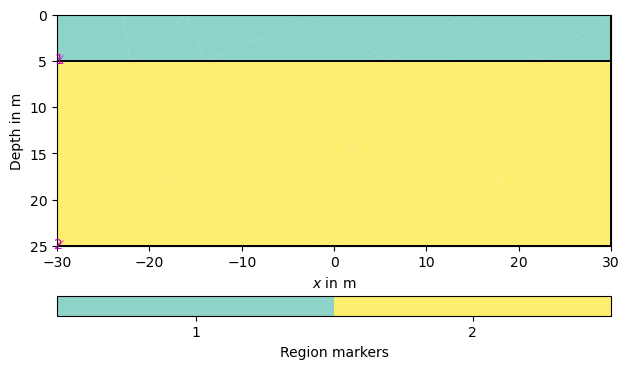

In [87]:
pg.show(world); 

### Create a line (e.g., dipping interface)

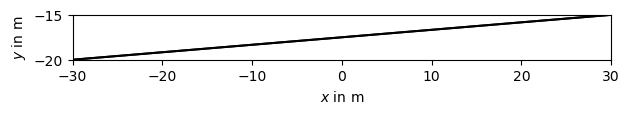

In [88]:
line = mt.createLine(start=[left, -20], end=[right, -15])
pg.show(line);

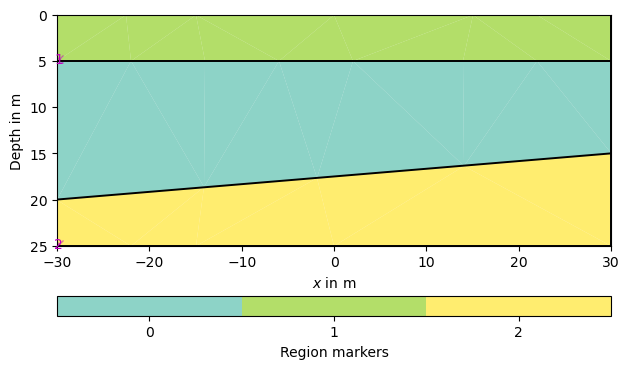

In [89]:
geometry = world + line
pg.show(geometry);

Note that the line cuts region 2 dividing it into two. The upper part does not contain a region marker and thus becomes region 0.

### Create a polygon (e.g., geological body)

Next we create a polygon that is closed and contains three vertices. You can add more nodes to the polygon with `addNodes` and define how to interpolate between these nodes with `interpolate`

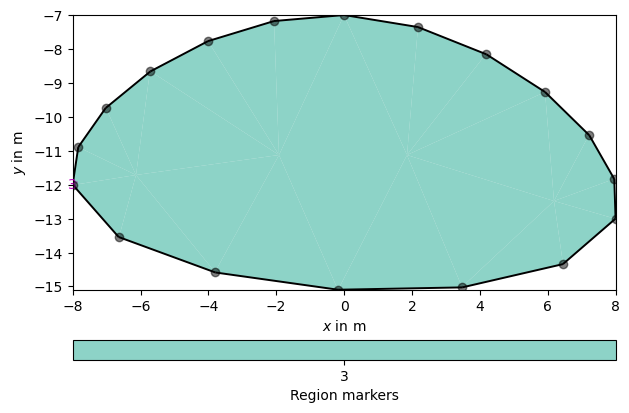

In [90]:
body = mt.createPolygon([[-8, -12], [0, -7], [8, -13]],
                        isClosed=True, marker=3,
                        addNodes=5,
                        interpolate='spline', 
                        )
pg.show(body, showNodes=True);

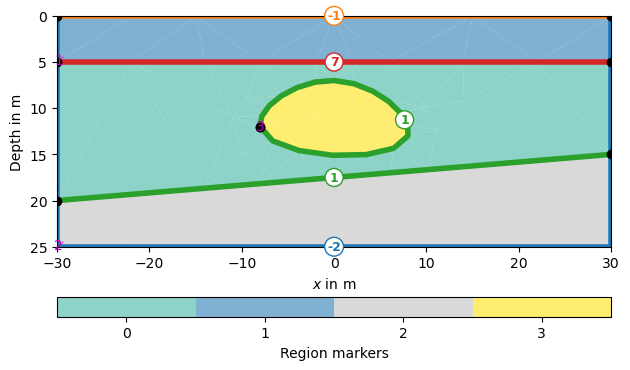

In [91]:
geometry += body
pg.show(geometry, boundaryMarkers=True);

## Mesh creation & quality

pyGIMLi has different ways to create meshes. [`mt.createMesh`](https://www.pygimli.org/pygimliapi/_generated/pygimli.meshtools.html?highlight=createmesh#pygimli.meshtools.createMesh) creates a mesh using *Triangle*, a two-dimensional constrained Delaunay mesh generator. 

The additional input parameters control the maximum triangle area and the mesh smoothness. The quality factor prescribes the minimum angles allowed in the final mesh. This can improve numerical accuracy, however, fine meshes lead to increased computational costs. Notice that we are now using [`showMesh`](https://www.pygimli.org/pygimliapi/_generated/pygimli.viewer.html?highlight=show#pygimli.viewer.showMesh) which is convenient for 2D mesh visualization.

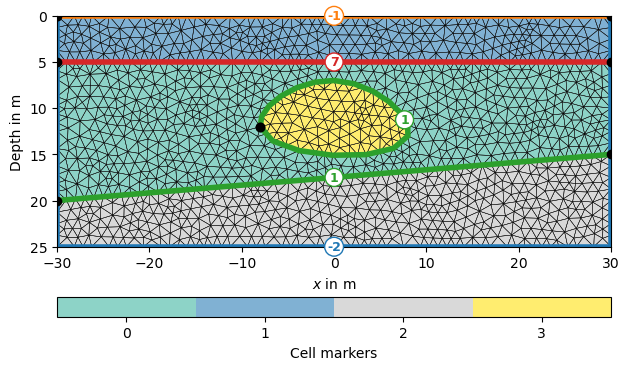

In [92]:
from pygimli.viewer import showMesh
mesh = mt.createMesh(geometry, 
                     area=1.0,
                     quality=33,
                     smooth=[2, 4] # [0:no smoothing or 1:node center or 2:weighted node center, # of iter]
                    )
showMesh(mesh, markers=True, showMesh=True); 

**Save geometry and mesh for later re-use**

In [93]:
mt.exportPLC(geometry, "geometry") # can be read by mt.importPLC()
mesh.save("mesh.bms"); # can be load by pg.load()

## Mesh modification

### Translating

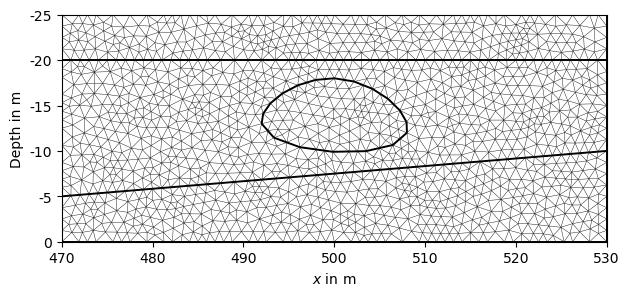

In [94]:
translated_mesh = pg.Mesh(mesh)
translated_mesh.translate([500, 25]) # Move 500 meters in x- and 25 meters in y-direction
pg.show(translated_mesh);

### Scaling

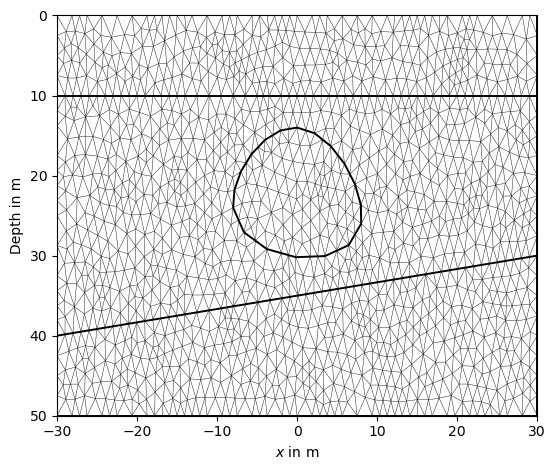

In [95]:
scaled_mesh = pg.Mesh(mesh) 
scaled_mesh.scale([1, 2])
pg.show(scaled_mesh);

In [96]:
pg.Report()

--------------------------------------------------------------------------------
  Date: Sat Feb 08 13:59:37 2025 W. Europe Standard Time

                OS : Windows (10 10.0.26100 SP0 Multiprocessor Free)
            CPU(s) : 12
           Machine : AMD64
      Architecture : 64bit
               RAM : 15.7 GiB
       Environment : Jupyter

  Python 3.11.11 | packaged by conda-forge | (main, Dec  5 2024, 14:06:23)
  [MSC v.1942 64 bit (AMD64)]

           pygimli : 1.5.3
            pgcore : 1.5.0
             numpy : 1.26.4
        matplotlib : 3.10.0
             scipy : 1.15.1
              tqdm : 4.67.1
           IPython : 8.32.0
           pyvista : 0.44.2
--------------------------------------------------------------------------------

Mesh: Nodes: 6 Cells: 0 Boundaries: 7


1

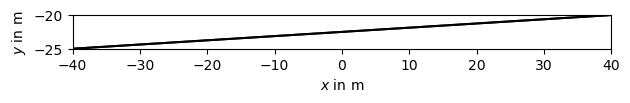

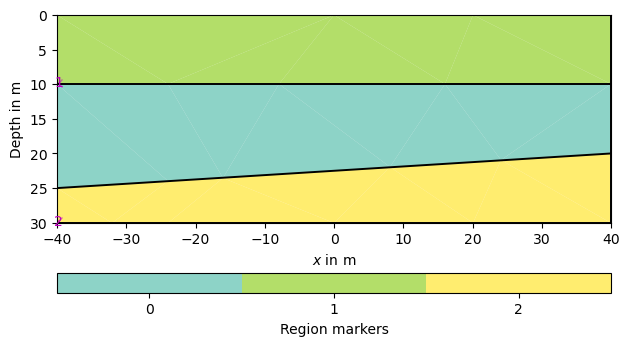

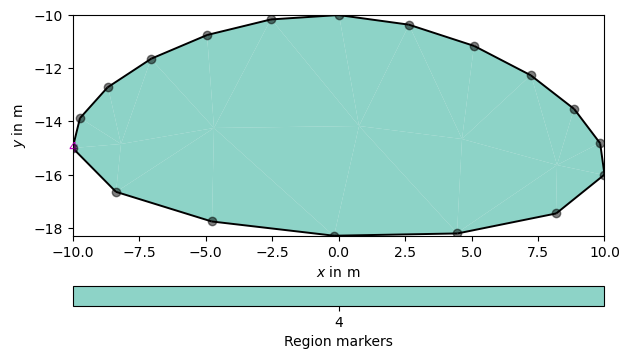

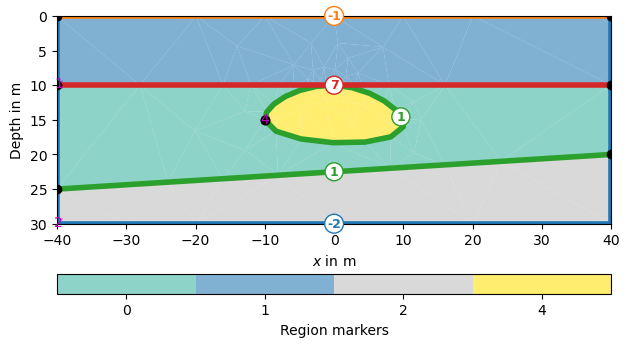

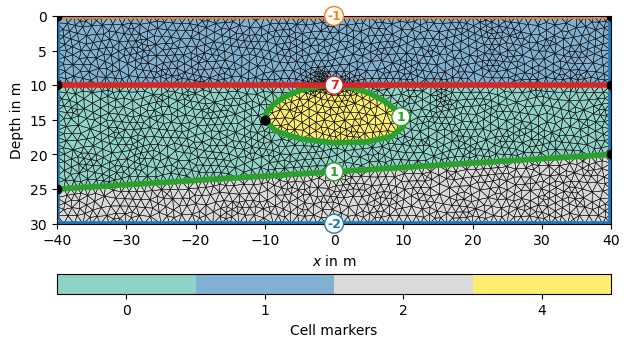

In [97]:
# Creating new different model
#  New velocities
new_high_velocity = 3500
new_low_velocity = 1200

# New world with different dimensions
new_left = -40
new_right = 40
new_depth = 30

new_world = mt.createWorld(start=[new_left, 0],
                           end=[new_right, -new_depth],
                           layers=[-10])
print(new_world)

# New line
new_line = mt.createLine(start=[new_left, -25], end=[new_right, -20])
pg.show(new_line);

# Combine world and line to create new geometry
new_geometry = new_world + new_line
pg.show(new_geometry);

# Create a new polygon (geological body)
new_body = mt.createPolygon([[-10, -15], [0, -10], [10, -16]],
                            isClosed=True, marker=4,
                            addNodes=5,
                            interpolate='spline')
pg.show(new_body, showNodes=True);

# Add the new body to the geometry
new_geometry += new_body
pg.show(new_geometry, boundaryMarkers=True);

# Create a new mesh
new_mesh = mt.createMesh(new_geometry, 
                         area=1.0,
                         quality=33,
                         smooth=[2, 4])
showMesh(new_mesh, markers=True, showMesh=True);

# Save the new geometry and mesh for later
mt.exportPLC(new_geometry, "new_geometry")
new_mesh.save("new_mesh.bms")